## Pandas Lab 1 (1-4, I additionally do 5 and 6)
Lab Objective: Though NumPy and SciPy are powerful tools for numerical computing, they lack
some of the high-level functionality necessary for many data science applications. Python’s pandas
library, built on NumPy, is designed specifically for data management and analysis. In this lab,
we introduce pandas data structures, syntax, and explore its capabilities for quickly analyzing and
presenting data.


# Q1.

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
index = np.arange(0,52,2) #vary as per needed
ser= pd.Series((index ** 2) - 1, index=index)
ser[index % 3 == 0] = 0
ser

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int32

# Q2.

In [3]:
def up(p,d):
    if np.random.binomial(1,p):
        d += 1
    else:
        d -= 1
    return d

def q2(p=0.5, d=100):
    
    index = pd.date_range(start='2000-01-01', end='2000-12-31')
    stocks = pd.Series(0 ,index)
    
    stocks[0] = d
    
    
    for i in range(len(stocks)-1):
        stocks[i+1] = up(p, stocks[i])
        if stocks[i+1] <= 0:
            stocks[i+1] = 0
            
    return stocks

In [4]:
q2(p=0.5, d=100)
q2(p=0.6, d=100)
q2(p=0.7, d=10)
q2(p=0.8, d=10)
q2(p=0.9, d=10)

2000-01-01     10
2000-01-02     11
2000-01-03     10
2000-01-04     11
2000-01-05     12
2000-01-06     13
2000-01-07     14
2000-01-08     15
2000-01-09     16
2000-01-10     17
2000-01-11     18
2000-01-12     19
2000-01-13     20
2000-01-14     21
2000-01-15     22
2000-01-16     23
2000-01-17     24
2000-01-18     25
2000-01-19     26
2000-01-20     27
2000-01-21     28
2000-01-22     29
2000-01-23     30
2000-01-24     31
2000-01-25     32
2000-01-26     33
2000-01-27     34
2000-01-28     35
2000-01-29     36
2000-01-30     37
             ... 
2000-12-02    272
2000-12-03    273
2000-12-04    274
2000-12-05    273
2000-12-06    274
2000-12-07    275
2000-12-08    274
2000-12-09    275
2000-12-10    276
2000-12-11    275
2000-12-12    276
2000-12-13    277
2000-12-14    278
2000-12-15    279
2000-12-16    278
2000-12-17    279
2000-12-18    278
2000-12-19    279
2000-12-20    280
2000-12-21    281
2000-12-22    282
2000-12-23    283
2000-12-24    284
2000-12-25    285
2000-12-26

# Q3.

In [5]:
name = ['Mylan', 'Regan', 'Justin', 
        'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie'] # Use the following data
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 
                            'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 
                              'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 
                             'Math_Major': major})

In [6]:
studentInfo[studentInfo['Age'] > 19][studentInfo['Sex']=='M'][['ID','Name']]

# SELECT ID, Name from 
# WHERE Age > 19 AND Sex = 'M' , could be modified according to criterions

C:\Users\AKG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Name
0,0,Mylan
6,6,Matt


# Q4.

In [7]:
df = pd.merge(studentInfo[studentInfo['Sex']=='M'] ,otherInfo, on='ID')[['ID','Age','GPA']]
df= df[df['Age']>19]
df

,ID,Age,GPA
0,0,20,3.8
3,6,20,3.8


# Q5.

top 5 years in decending order of crime amount

1980
1991
1981
1990
1989

Special years

1973
1974


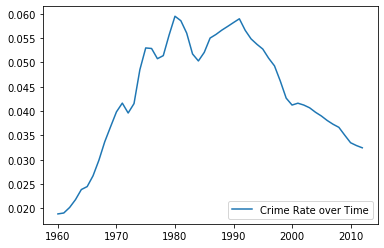

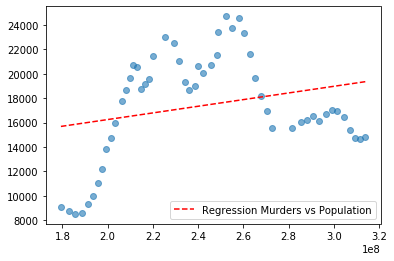

In [8]:
df = pd.read_csv('crime_data.txt', skiprows = [0], index_col=0)

# new column, crime rate
df = df.assign(Crime_Rate=(df['Total'] / df['Population']))

fig, ax = plt.subplots(1,1)
plt.plot(df.index, df['Crime_Rate'])
ax.legend(['Crime Rate over Time'])


# top 5 years in decending order of crime amount
cr = df.sort_values(['Crime_Rate'])[-5:][::-1]
print('top 5 years in decending order of crime amount\n')
[print(i) for i in cr.index.values]

# Calculate the average number of total crimes 
# as well as burglary crimes between 1960 and 2012.

avg_tot = df['Total'].mean()
avg_burg = df['Burglary'].mean()

# Find the years for which the total number of crimes was 
# below average, but the number of burglaries was above average.

myYears = df.loc[(df['Total'] < avg_tot) & (df['Burglary'] > avg_burg)]
print('\nSpecial years\n')
[print(i) for i in myYears.index.values]

regression = linregress(df['Population'], df['Murder'])
slope, intercept = regression[0], regression[1]

fig1, ax1 = plt.subplots(1,1)
plt.scatter(df['Population'], df['Murder'], alpha=0.6)
plt.plot(df['Population'], intercept + slope * df['Population'],'r--')
ax1.legend(['Regression Murders vs Population'])

df_out = df[['Population', 'Violent', 'Robbery']]

idx = [1979 < i < 1990 for i in df_out.index.values]
df_out = df_out.iloc[idx,:]
df_out.to_csv('crime_subset.csv')

# Q6.

In [9]:
titanic  = pd.read_csv('titanic.csv')
titanic = titanic.drop(["Sibsp", "Parch", "Cabin", "Boat", "Body", "home.dest"], axis=1)
titanic.dropna(subset=['Survived'], inplace=True)
titanic.Survived.replace({1: True, 0: False}, inplace=True)
titanic.Age.fillna(titanic.Age.mean())
titanic.to_csv('titanic_clean.csv')

Next, answer the following questions.
• How many people survived? What percentage of passengers survived?

• What was the average price of a ticket? How much did the most expensive ticket cost?

• How old was the oldest survivor? How young was the youngest survivor? What about
non-survivors?

In [10]:
print(titanic.Survived.sum())
print(titanic.Survived.sum() / len(titanic) * 100, '%')
print(titanic.Fare.mean())
print(titanic.Fare.max())
print(titanic[titanic.Survived].Age.max())
print(titanic[titanic.Survived].Age.min())
print(titanic[titanic.Survived == False].Age.max())
print(titanic[titanic.Survived == False].Age.min())

500
38.19709702062643 %
33.29547928134572
512.3292
80.0
0.1667
74.0
0.3333
